Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 11.2

## Part A.  Currency trading (Slightly simplified version of 15.3-6 from Cormen et al.)

Imagine that you wish to exchange one currency for another. You realize that instead of directly exchanging one currency for another, you might be better off making a series of trades through other currencies, winding up with the currency you want.

Suppose that you can trade n different currencies, numbered $1,2,… ,n$, where you start with currency 1 and wish to wind up with currency $n$. You are given, for each pair of currencies $i$ and $j$ , an exchange rate $r_{ij}$ , meaning that if you start with $d$ units of currency $i$ , you can trade for $dr_{ij}$ units of currency $j$. Note that the total number of trades allowed is limited to $n$.

Assuming there is no commission, propose an algorithm (described in prose) to solve this problem using either a memoization or bottom-up strategy. **Note that we will be working on the Python implementation in class.**

Click [here](https://drive.google.com/open?id=1L8Fjo1Xt8sltab-tz3m91eTuiE9LYWF7) for some example data.

For this problem I decided to use a memoization approach which is bassed on storing the solutions to subproblems, so when we see them again, we won't have to recompute the solutions to them. To visualize my approach I drew a diagram in which I chose an arbitrary currency to start with (CAD) - further I drew the tree that split into other currecies to create the combinations of all possible tradings. Further, in the first subtree I marked the exchanged rates for those particular currencies. As we can see, certain combinations repeat in other subtrees - some of the combiantions I have outlined with a red marker to show that for those we would not have to recalculate the profit because we would have already had it after calculating the first subtree (I did not mark all of them but just a few to show my approach). Therefore, the algorithm I suggest is based on creating a hash table in which we would save the exchanges that we calculate and every time we run through the possible exchanges, we would check the hash table to idenitfy whether such comparison has already been made in order to decrease time complexity of our algorithm.

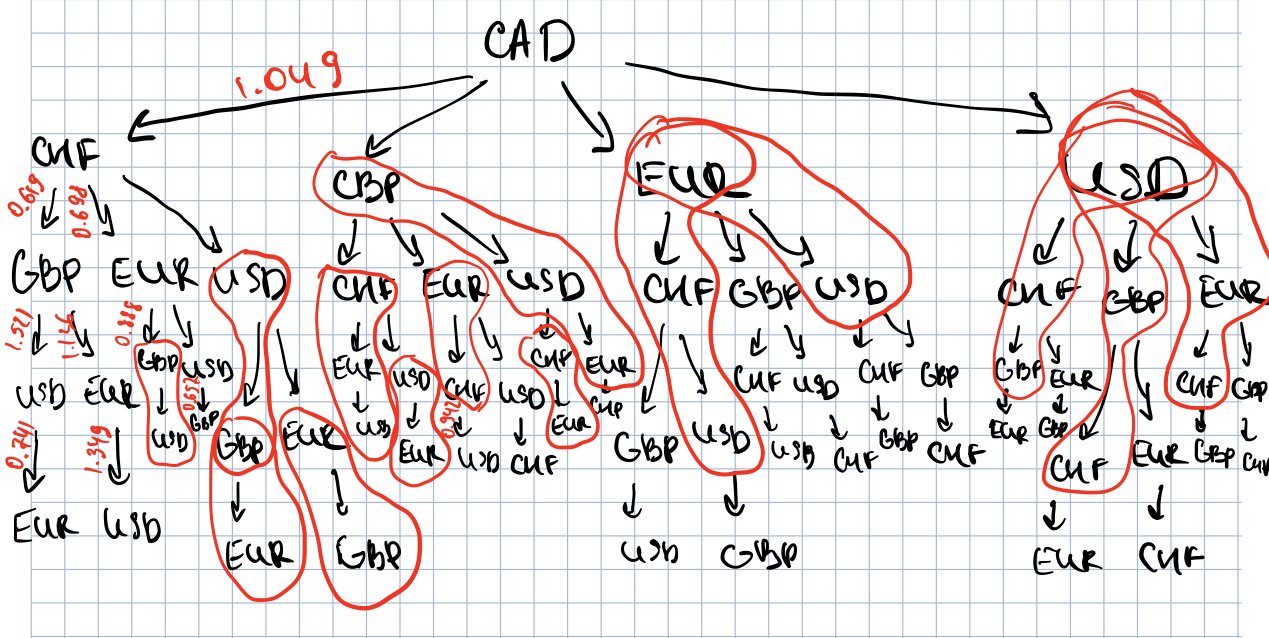

In [2]:
from IPython.display import Image
Image(filename='IMG_5D8BE287DD2A-1.jpeg')

## Part B - Money game (Solution)
Consider a row of n coins of values $v_1, v_2,...,v_n$, **where $n$ is even**. We play a game against an opponent by alternating turns. In each turn, a player selects either the first or last coin from the row, removes it from the row permanently, and receives the value of the coin. Determine the maximum possible amount of money we can definitely win if we move first.

For example, consider the game:

\$2, \$10, \$1, \$5

By moving first and playing optimally one can be guaranteed of \$15. The first move is to take \$5. This forces your opponent to take either \$2 or \$1, and then allows you to take \$10. Assume that the opposing player also plays optimally (i.e., minimizing the gain of the first-move player.)

As a hint, we will provide the recurrence for the solution to this problem. Suppose $c(i,j)$ is the maximum possible amount of money the first player can win for the row of coins of value $v_i, v){i+1},...,v_j$ (so to solve our problem, we need to compute $c(1,n)$. Then:

$$c(i,j)=max[v_i+min(c(i+2,j), c(i+1,j-1)), v_j+min(c(i,j-2), c(i+1,j-1))]$$

You are also encouraged to watch [this video](https://www.youtube.com/watch?v=KnP8_L13xW4&list=PLF_a-qBXTGFektoI6JUOTRL36JlvD04BR&index=5) if you need some more hints.

## Question 1. 
Complete the following function to solve the game using a bottom-up strategy, assuming that the opposing player also plays optimally. 


In [3]:
def bottom_up_coin_game(A):
    """
    Returns the maximum possible amount of money the first-move player can win,
    given an array of coin values. The function solves this using a bottom-up 
    approach.
    
    Inputs:
    - A: list of floats, values of the coins, of even length. 
    
    Outputs:
    - max_val: float, maximum possible amount of money that can be won by the first 
    player. max_val is None when the length of list A is odd.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [43]:
def bottom_up_coin_game(A):
    #setting the indexes values (first and last items)
    i = 0
    j = len(A)-1
    #if the list's length is odd, return None
    if len(A)%2 != 0:
        return None
    #if the list is empty, return 0
    if len(A) == 0:
        return 0
    #if the list consists of 1 number, pick any of them
    elif j == i:
        return A[i]
    #if the list consists of 2 numberrs, pick a bigger one
    elif j == i+1:
        return max(A[i], A[j])
    #compare the necessary numbers to make the choices and return the values of the numbers 
    else: 
        return min(bottom_up_coin_game(A[2:len(A)]),bottom_up_coin_game(A[1:len(A)-1])) + A[-1]+ min(bottom_up_coin_game(A[1:len(A)-1]),bottom_up_coin_game(A[1+1:len(A)]))
        
        
bottom_up_coin_game([2, 12, 1, 5])

15

This code only works for 4 coins scenario though, and I was not sure about how to extend it:(

In [44]:
import numpy as np
assert(bottom_up_coin_game([2, 10, 1, 5]) == 15)  
assert(bottom_up_coin_game([2, 10, 1, 5, 5]) is None)  
assert(bottom_up_coin_game([]) == 0)  

## [Optional]  Question 2. 

Complete the function `print_strategy` to print out a solution to the coin game. Completing the helper function `extended_bottom_up_coin_game` to use in `print_strategy` is optional.

In [ ]:
def print_strategy(A):
    """
    Print coins to pick for the first player
    
    Inputs:
    - A: list of floats, values of the coins, of even length.
    
    Outputs:
    - max_val: float, maximum possible amount of money that can be won by the first 
    player. 
        * max_val is None if the length of list A is odd.
        * max_val is 0 if list A is empty (no coins)
    - out: list of values of the coins that the first player picks in that
    order.
        * out is None if max_val is 0 or None.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert(print_strategy([4,6,5,20,4,6,4,8])[0] == 40)
assert(print_strategy([4,6,5,20,4,6,4,8])[1] == [8, 6, 6, 20])